<a href="https://colab.research.google.com/github/akshaya-02ly/akshaya2260-nlp/blob/main/lab_10_2(nlp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gensim

In [3]:
# ================================
# Loading Pre-trained Embeddings
# ================================
from gensim.models import KeyedVectors
import gensim.downloader as api

# ================================
# Handling Matrices & Numerical Operations
# ================================
import numpy as np

# ================================
# Visualization
# ================================
import matplotlib.pyplot as plt

# ================================
# t-SNE for Dimensionality Reduction
# ================================
from sklearn.manifold import TSNE

In [4]:
# Load pre-trained Word2Vec model (may take time on first download)
model_word2vec = api.load("word2vec-google-news-300")
model_glove = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 128.1/128.1MB downloaded


In [5]:
word_list2 = [

    # Emotions
    "happy", "sad", "angry", "fear", "joy",

    # Sports
    "cricket", "football", "tennis", "hockey", "badminton",

    # Food
    "rice", "pizza", "burger", "apple", "banana",

    # Professions
    "engineer", "lawyer", "scientist", "artist", "pilot",

    # Colors
    "red", "blue", "green", "yellow", "black",

    # Space
    "planet", "star", "galaxy", "moon", "asteroid",

    # Musical Instruments
    "guitar", "piano", "violin", "drum", "flute",

    # Weather
    "rain", "storm", "cloud", "wind", "snow"
]

In [8]:
vectors = [model_word2vec[word] for word in word_list2 if word in model_word2vec]

# Convert to NumPy array
vectors_word2vec = np.array(vectors)

print("Total selected words:", len(word_list2))
print("Vector shape:", vectors_word2vec.shape)
print(vectors_word2vec[0])

Total selected words: 40
Vector shape: (40, 300)
[-5.18798828e-04  1.60156250e-01  1.60980225e-03  2.53906250e-02
  9.91210938e-02 -8.59375000e-02  3.24218750e-01 -2.17285156e-02
  1.34765625e-01  1.10351562e-01 -1.04980469e-01 -2.90527344e-02
 -2.38037109e-02 -4.02832031e-02 -3.68652344e-02  2.32421875e-01
  3.20312500e-01  1.01074219e-01  5.83496094e-02 -2.91824341e-04
 -3.29589844e-02  2.11914062e-01  4.32128906e-02 -8.59375000e-02
  2.81250000e-01 -1.78222656e-02  3.79943848e-03 -1.71875000e-01
  2.06054688e-01 -1.85546875e-01  3.73535156e-02 -1.21459961e-02
  2.04101562e-01 -3.80859375e-02  3.61328125e-02 -8.15429688e-02
  8.44726562e-02  9.37500000e-02  1.44531250e-01  7.42187500e-02
  2.51953125e-01 -7.91015625e-02  8.69140625e-02  1.58691406e-02
  1.09375000e-01 -2.23632812e-01 -5.15747070e-03  1.68945312e-01
 -1.36718750e-01 -2.51464844e-02 -3.85742188e-02 -1.33056641e-02
  1.38671875e-01  1.76757812e-01  1.10351562e-01  1.51367188e-01
  7.86132812e-02 -1.69921875e-01  1.20605

In [10]:
vectors = [model_glove[word] for word in word_list2 if word in model_glove]

# Convert to NumPy array
vectors_glove = np.array(vectors)

print("Total selected words:", len(word_list2))
print("Vector shape:", vectors_glove.shape)
print(vectors_glove[0])

Total selected words: 40
Vector shape: (40, 100)
[-0.090436   0.19636    0.29474   -0.47706   -0.80436    0.3078
 -0.55205    0.58453   -0.17056   -0.84846    0.19528    0.23671
  0.46827   -0.58977   -0.12163   -0.24697   -0.072944   0.17259
 -0.0485     0.9527     0.50629    0.58497   -0.19367   -0.45459
 -0.031095   0.51633   -0.24052   -0.1007     0.53627    0.024225
 -0.50162    0.73692    0.49468   -0.34744    0.89337    0.057439
 -0.19127    0.39333    0.21182   -0.89837    0.078704  -0.16344
  0.45261   -0.41096   -0.19499   -0.13489   -0.016313  -0.021849
  0.17136   -1.2413     0.079503  -0.91144    0.35699    0.36289
 -0.24934   -2.1196     0.14534    0.52964    0.90134    0.033603
  0.022809   0.70625   -1.0362    -0.59809    0.70592   -0.072793
  0.67033    0.52763   -0.47807   -0.67374    0.36632   -0.38284
 -0.10349   -0.6402     0.18104    0.82568    0.066403  -0.40791
 -0.083813  -0.36487    0.045362  -0.073527  -0.20117    0.37441
 -1.4024    -0.25605   -0.4708    -0.

In [11]:
# Assume vectors already extracted from previous step
# vectors shape example: (40, 100)

# Apply t-SNE
tsne = TSNE(
    n_components=2,      # Reduce to 2D
    random_state=42,
    perplexity=10,
    learning_rate=200
)

tsne_coordinates = tsne.fit_transform(vectors_word2vec)

# Store results
print("Original Shape:", vectors_word2vec.shape)
print("Reduced Shape:", tsne_coordinates.shape)

# Display first 5 coordinates
print("\nFirst 5 t-SNE Coordinates:")
print(tsne_coordinates[:5])
# Display first 5 coordinates of word2vec
print("\nFirst 5 t-SNE Coordinates:")
print(vectors_word2vec[:5])

Original Shape: (40, 300)
Reduced Shape: (40, 2)

First 5 t-SNE Coordinates:
[[ 225.98317 -136.69174]
 [ 240.65681 -227.10785]
 [-226.55423 -188.52129]
 [-162.62546 -265.79834]
 [-222.04536  459.0187 ]]

First 5 t-SNE Coordinates:
[[-0.0005188   0.16015625  0.0016098  ... -0.03540039  0.08886719
  -0.30273438]
 [ 0.18945312  0.04589844  0.06689453 ... -0.06201172  0.08251953
  -0.0255127 ]
 [ 0.22265625  0.08789062  0.12597656 ...  0.08886719  0.0859375
   0.04248047]
 [ 0.19824219  0.01544189  0.10888672 ... -0.17089844  0.13964844
   0.07226562]
 [ 0.4453125  -0.20019531  0.20019531 ... -0.07714844 -0.04663086
  -0.17578125]]


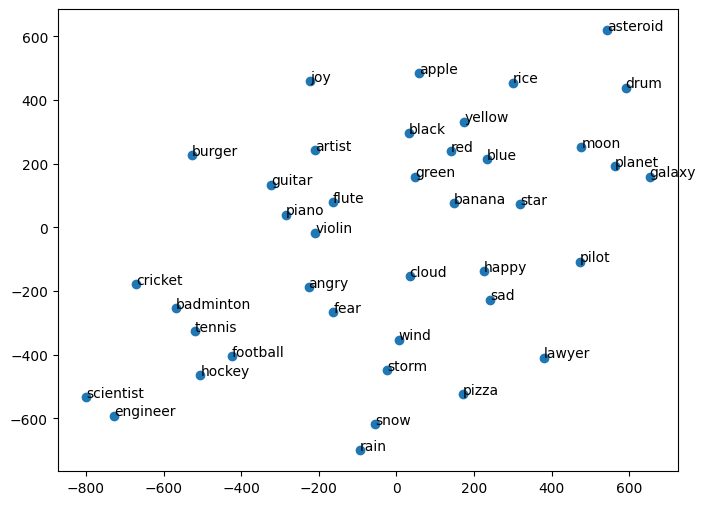

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tsne_coordinates[:,0], tsne_coordinates[:,1])

for i, word in enumerate(word_list2):
    plt.annotate(word, (tsne_coordinates[i,0], tsne_coordinates[i,1]))

plt.show()